In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataframe


In [2]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


checking duplicates rows

In [3]:
df.duplicated().sum()

0

checking missing value

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


removing unnamed column


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


focusing on ram column and weight .

In [8]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


###changing the type of a column

In [10]:
df['Ram']=df['Ram'].astype('int64')
df['Weight']=df['Weight'].astype('float64')
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32


### checking the data types of all column

In [11]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

### EDA(exploratory data analysis)

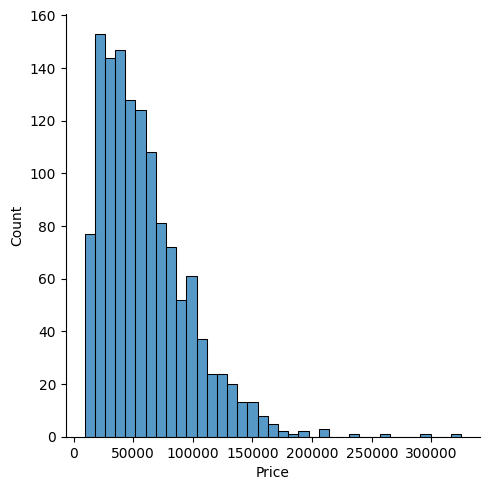

In [12]:
sns.displot(df['Price'])

### company column


In [13]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot: >

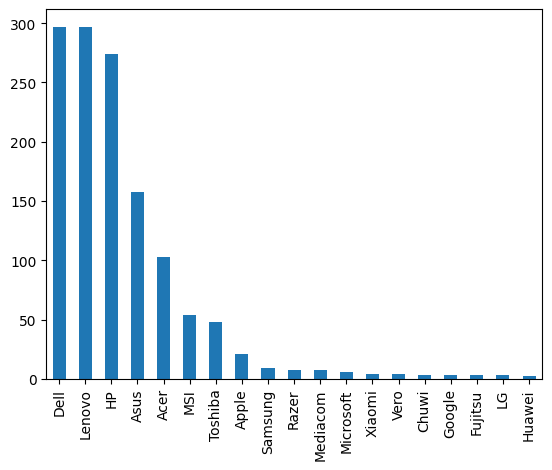

In [14]:
df['Company'].value_counts().plot(kind='bar')

### analyzing the relation b/w company and price column

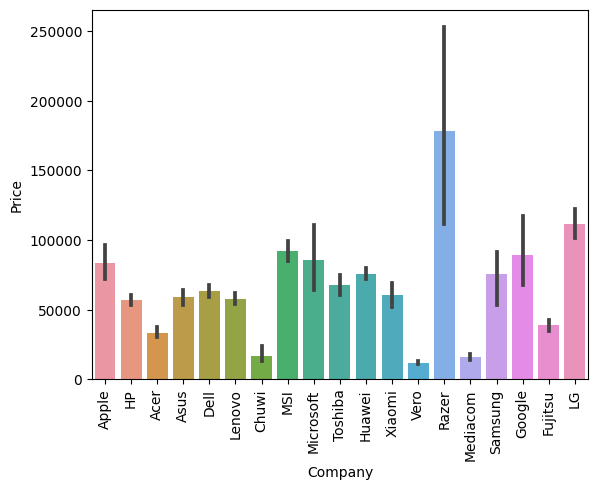

In [15]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### type name column


<AxesSubplot: >

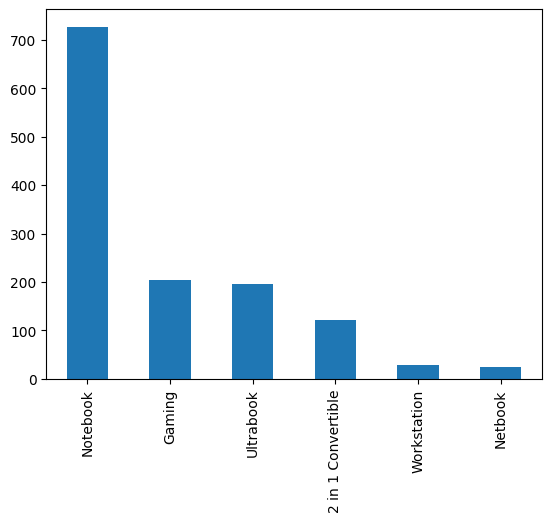

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

### inches column


<AxesSubplot: >

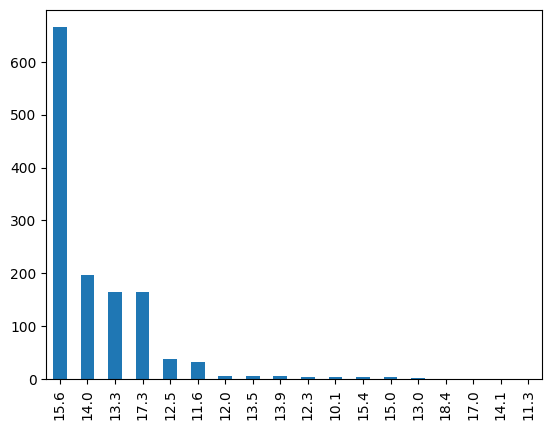

In [17]:
df['Inches'].value_counts().plot(kind='bar')

### screen resolution


<AxesSubplot: >

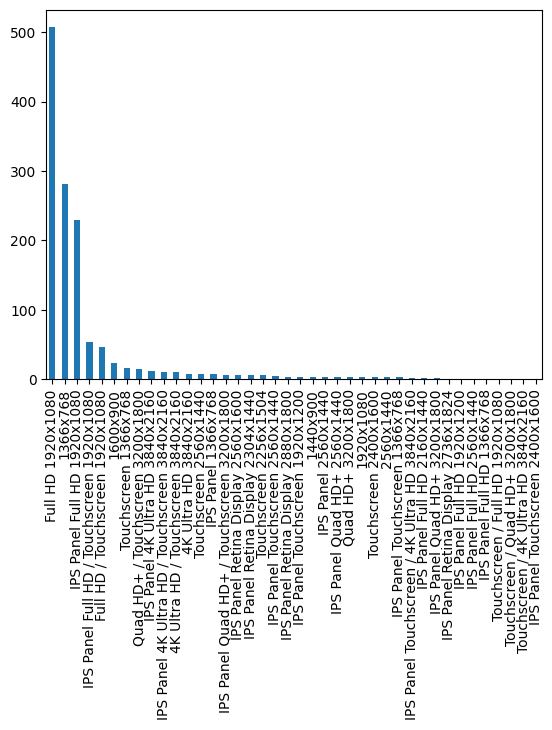

In [18]:
df['ScreenResolution'].value_counts().plot(kind='bar')

In [19]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### FEATURE ENGINEERING

#Making new column

In [20]:
df['touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<AxesSubplot: >

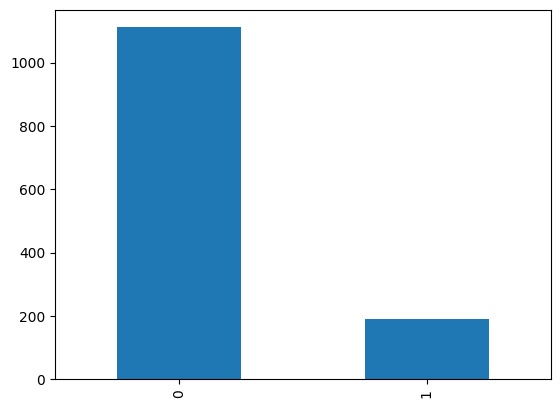

In [21]:
df['touchscreen'].value_counts().plot(kind='bar')

# relation b/w touchscreen and price

<AxesSubplot: xlabel='touchscreen', ylabel='Price'>

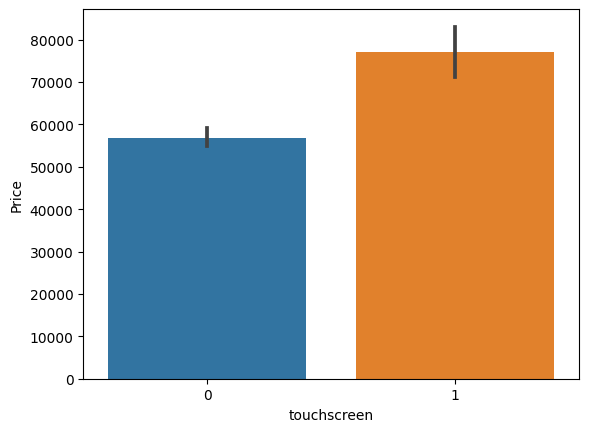

In [22]:
sns.barplot(x=df['touchscreen'],y=df['Price'])

#making IPS column


In [23]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot: >

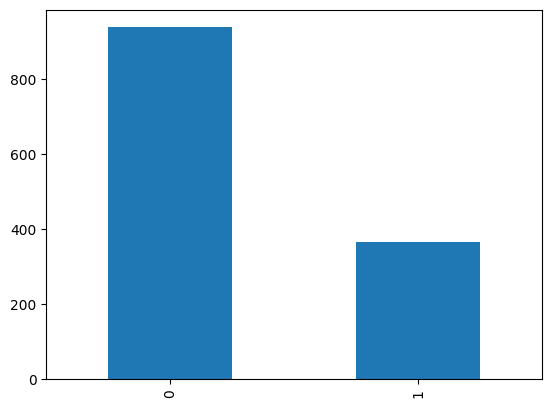

In [24]:
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='IPS', ylabel='Price'>

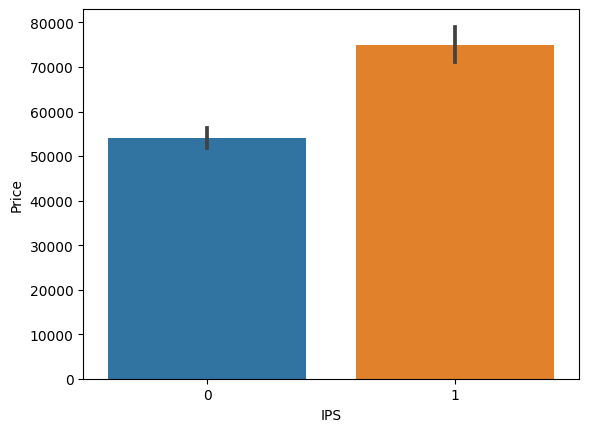

In [25]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


### making new column of x resolutuion and y resolution

making a temporary dataframe

In [27]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [28]:
df['x_res']=new[0]
df['y_res']=new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


### writing regular expression for x_res column

In [29]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [32]:
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 142.6+ KB


### corelation b/w price and other parameter

In [34]:
df.corr()['Price']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

### making PPI(PIXEL PER INCH) column


In [35]:
df['PPI']=((df['x_res']**2)+(df['y_res']**2))**.5/df['Inches']

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [37]:
df['PPI'].dtype

dtype('float64')

In [38]:
df.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Inches,Ram,Weight,Price,touchscreen,IPS,x_res,y_res,PPI
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.414804
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437,0.303763
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.323240
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.473487
touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.460587
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.300879
x_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.931217
y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.939363
PPI,-0.414804,0.303763,-0.323240,0.473487,0.460587,0.300879,0.931217,0.939363,1.000000


In [39]:
df.corr()['Price']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [40]:
df.drop(columns=['ScreenResolution','x_res','y_res','Inches'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### CPU column

In [41]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

adding new column

In [42]:
df['CPU']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,PPI,CPU
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [43]:
def fetchcpu(text):
    if text =='Intel Core i7' or text == 'Intel Core i5' or text=='Intel Core i3' :
        return text
    elif text.split()[0]=='Intel':
        return 'other intel processor'
    else:
        return 'AMD Processor'

In [44]:
df['cpu brand']=df['CPU'].apply(fetchcpu)

In [45]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,PPI,CPU,cpu brand
780,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42,191211.264,0,1,127.335675,Intel Core i7,Intel Core i7


<AxesSubplot: >

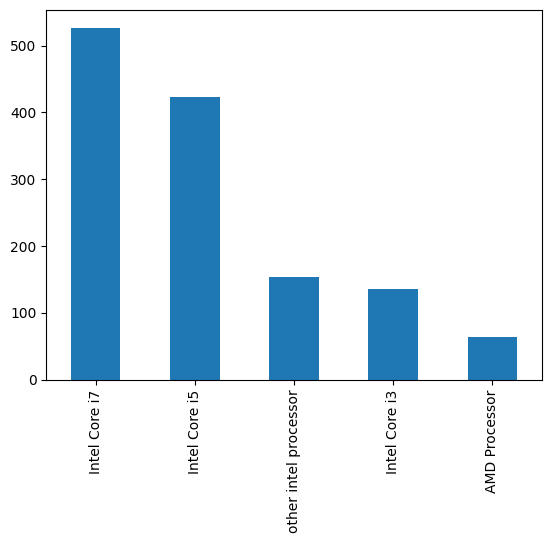

In [46]:
df['cpu brand'].value_counts().plot(kind='bar')

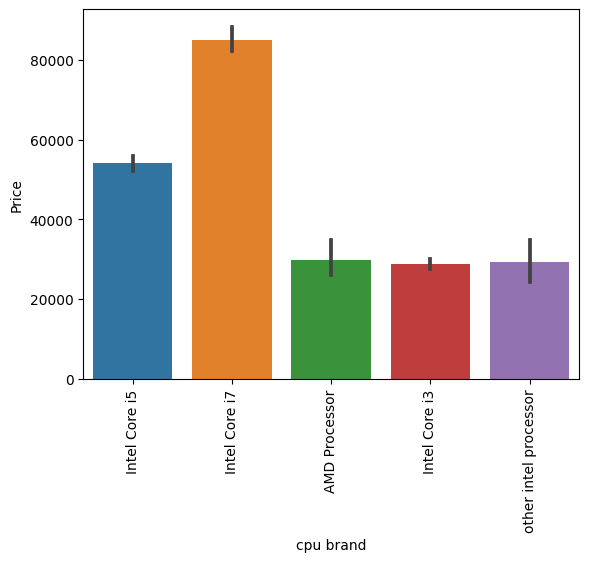

In [47]:
sns.barplot(x=df['cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df.drop(columns=['CPU','Cpu'],inplace=True)

In [49]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,PPI,cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### MEMORY COLUMN

In [50]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split("+",n=1,expand=True)

df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1FlashStorage']=df['first'].apply(lambda x :1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','')

df['second'].fillna("0",inplace=True)

df['Layer2HDD']=df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2FlashStorage']=df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','')

df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['FlashStorage']=(df['first']*df['Layer1FlashStorage']+df['second']*df['Layer2FlashStorage'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\2254356094.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\2254356094.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second']=df['second'].str.replace(r'\D','')


In [51]:
df.drop(columns=['first','second','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD','Layer1Hybrid','Layer2Hybrid',
                 'Layer1FlashStorage','Layer2FlashStorage','Memory',],inplace=True)

In [52]:
df.drop(columns=['Hybrid','FlashStorage'],inplace=True)

In [53]:
df.corr()['Price']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS            0.252208
PPI            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

### GPU COLUMN

In [54]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [55]:
df['Gpu']=df['Gpu'].apply(lambda x: x.split()[0])

In [56]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,PPI,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


dtype('float64')

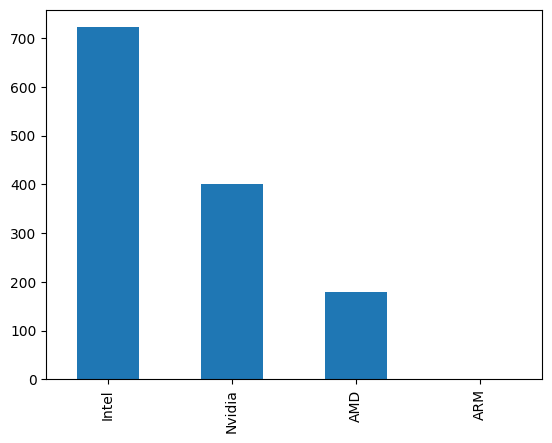

In [57]:
df['Gpu'].value_counts().plot(kind='bar')
df['Weight'].dtype

In [58]:
# creating a dataframe removing rows where "arm" is found

In [59]:
df=df[df['Gpu']!="ARM"]

In [60]:
df.shape

(1302, 13)

<AxesSubplot: xlabel='Gpu', ylabel='Price'>

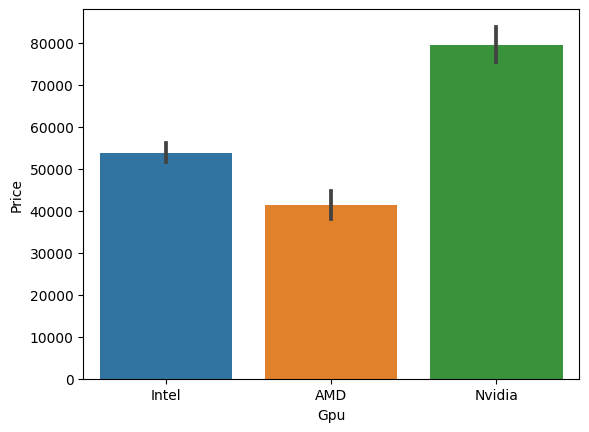

In [61]:
sns.barplot(x=df['Gpu'],y=df['Price'])

# cheking median for looking outliers

<AxesSubplot: xlabel='Gpu', ylabel='Price'>

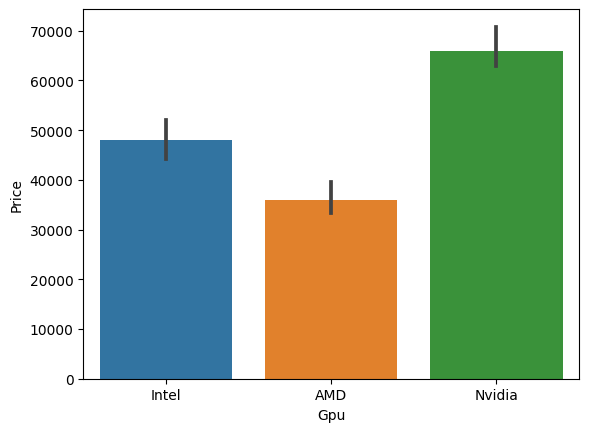

In [62]:
sns.barplot(x=df['Gpu'],y=df['Price'], estimator=np.median)

In [63]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [64]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,PPI,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [65]:
def catos(text):
    if text=="macOS" or text=="Mac OS X":
        return 'Mac'
    elif text=="Windows 10" or text=="Windows 7" or text=="Windows 10 S":
        return 'Windows'
    else:
        return 'Otheres/No OS/Linux'

In [66]:
df['OpSys']=df['OpSys'].apply(catos)

<AxesSubplot: xlabel='OpSys', ylabel='Price'>

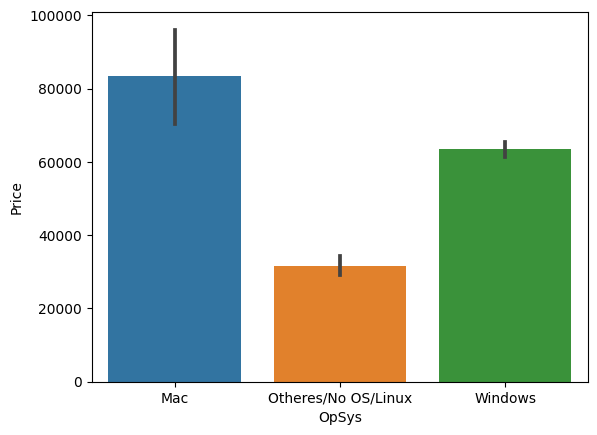

In [67]:
sns.barplot(x=df['OpSys'],y=df['Price'])

# heatmap

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

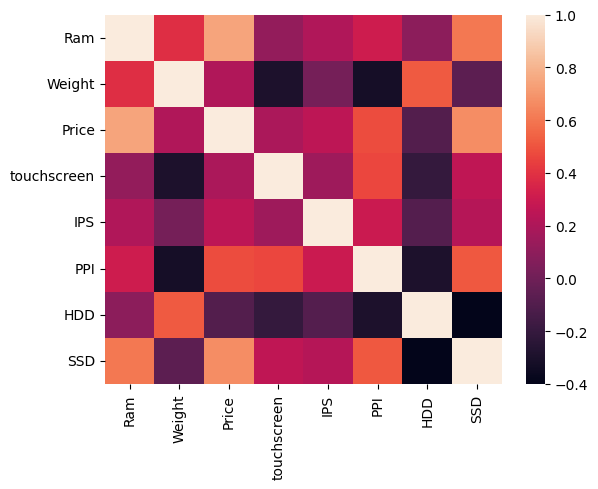

In [68]:
sns.heatmap(df.corr())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

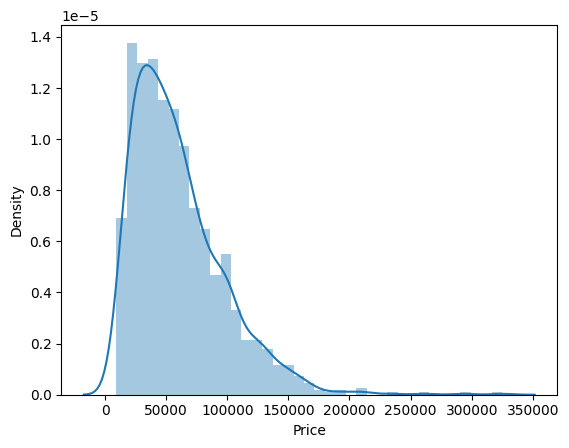

In [69]:
sns.distplot(df['Price'])

#our price(target) column is skewed which is little bit confusing for our model 
so we apply log transformation

# log transformation

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10860\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<AxesSubplot: xlabel='Price', ylabel='Density'>

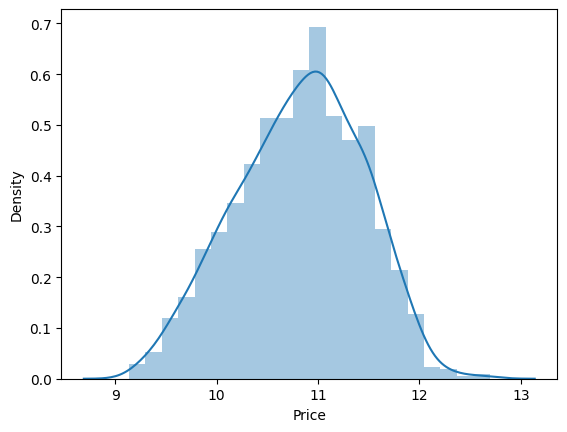

In [70]:
sns.distplot(np.log(df['Price']))

In [71]:
df.iloc[:,[0,1,2,5,6,7,8,9,10,11,3,4]]

,Company,TypeName,Ram,Weight,Price,touchscreen,IPS,PPI,cpu brand,HDD,Gpu,OpSys
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,Intel,Otheres/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,other intel processor,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,AMD,Windows


# MODEL

# inter changing data frame column

In [72]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])
#X.iloc[:,[0,1,2,5,6,7,8,9,10,11,3,4]]

# TRAIN TEST SPLIT

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=2)


In [74]:
X_train

,Company,TypeName,Ram,Gpu,OpSys,Weight,touchscreen,IPS,PPI,cpu brand,HDD,SSD
532,Asus,Notebook,8,Nvidia,Windows,2.00,0,1,282.423996,Intel Core i7,1000,256
1123,Dell,Notebook,4,Intel,Otheres/No OS/Linux,2.09,0,0,100.454670,Intel Core i5,500,0
370,Asus,2 in 1 Convertible,12,Nvidia,Windows,2.26,1,0,141.211998,Intel Core i7,2000,512
615,Asus,Gaming,8,Nvidia,Windows,3.00,0,0,127.335675,Intel Core i7,1000,128
68,Lenovo,Notebook,4,Intel,Windows,1.90,0,0,141.211998,Intel Core i5,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia,Windows,2.20,0,0,100.454670,Intel Core i3,500,0
299,Asus,Ultrabook,16,Nvidia,Windows,1.63,0,0,141.211998,Intel Core i7,0,512
493,Acer,Notebook,8,AMD,Windows,2.20,0,0,100.454670,AMD Processor,1000,0
527,Lenovo,Notebook,8,Nvidia,Otheres/No OS/Linux,2.20,0,0,100.454670,Intel Core i3,2000,0


In [75]:
X_test

,Company,TypeName,Ram,Gpu,OpSys,Weight,touchscreen,IPS,PPI,cpu brand,HDD,SSD
248,HP,Notebook,4,Intel,Windows,1.49,0,1,165.632118,Intel Core i5,500,0
555,Asus,Notebook,4,Intel,Otheres/No OS/Linux,2.00,0,0,100.454670,other intel processor,500,0
1251,HP,Notebook,4,AMD,Windows,1.86,0,0,100.454670,AMD Processor,500,0
547,Lenovo,Notebook,4,Intel,Otheres/No OS/Linux,2.15,0,0,141.211998,Intel Core i5,1000,0
885,HP,2 in 1 Convertible,4,Intel,Windows,1.28,1,0,165.632118,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Dell,Notebook,4,Intel,Windows,2.24,0,0,100.454670,Intel Core i5,500,0
1225,Asus,Notebook,4,Intel,Windows,2.65,0,0,100.454670,other intel processor,1000,0
1140,Lenovo,2 in 1 Convertible,16,Intel,Windows,2.80,1,1,209.800683,Intel Core i7,0,512
407,Dell,Ultrabook,8,Intel,Windows,1.36,0,0,157.350512,Intel Core i7,0,512


# CREATING PIPELINE FOR OUR MODEL

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [77]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import LogisticRegression

# linear regression

In [78]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])
# step2=LinearRegression()
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# Ridge regressor

In [79]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])
# step2=Ridge(alpha=2)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# Lasso Regressor

In [80]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])

# step2=Lasso(alpha=.001)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# KNN

In [81]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])

# step2=KNeighborsRegressor(n_neighbors=16)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# Decision Tree

In [82]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])

# step2=DecisionTreeRegressor(max_depth=10)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# SVM(support vector machine)

In [83]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])

# step2=SVR(kernel='rbf',C=10000,epsilon=.2)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# RANDOM FOREST

In [84]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=.5,
                            max_features=.75,
                            max_depth=15)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

# extra tree

In [85]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])

# step2=ExtraTreesRegressor(n_estimators=100,
#                             random_state=3,
#                             max_features=.75,
#                             max_depth=15)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# Ada boost

In [86]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])
# step2=AdaBoostRegressor(learning_rate=.1,n_estimators=11)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# Gradient boost

In [87]:
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
# ])
# step2=GradientBoostingRegressor(learning_rate=.1,n_estimators=300)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# cheking the accuracy of the model


In [88]:
from sklearn.metrics import r2_score,mean_absolute_error
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.8753583052887972
MAE 0.16837395856206444


In [89]:
np.exp(0.21)

1.2336780599567432

In [90]:
# effective algo
#1-knn:.6973
#2-decision tree:.7156
#3-svm:.7062
#random forest:.7191
#gradient boost:7121

# exporting the model

In [96]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

In [95]:
import sklearn

sklearn.__version__


'1.1.3'

In [ ]:
df.head(1252)

In [ ]:
X_test

In [ ]:
np.exp(pipe.predict(pd.DataFrame([['HP','Notebook',4,'AMD','Windows',1.86,0,0,100.454670,'AMD Processor',500,0]],columns=['Company','TypeName','Ram','Gpu','OpSys','Weight','touchscreen','IPS','PPI','cpu brand','HDD','SSD'])))